# Assignment 4
Anshul Reddy Anandula
700734890

In [107]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# Question 1
Applying Linear Regression

In [108]:
#reading the dataset
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [109]:
#Splitting the dataset into 1/3 test data
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values
X_Training, X_Testing, Y_Training, Y_Testing = train_test_split(X,Y, test_size=1/3,random_state = 0)

In [110]:
# fitting the linear regression
regressor = LinearRegression()
regressor.fit(X_Training, Y_Training)
regressor.score(X_Training,Y_Training)

0.9381900012894278

In [111]:
#calculating the mean squared error
Y_Predict = regressor.predict(X_Testing)

mean_squared_error(Y_Testing,Y_Predict)

21026037.329511303

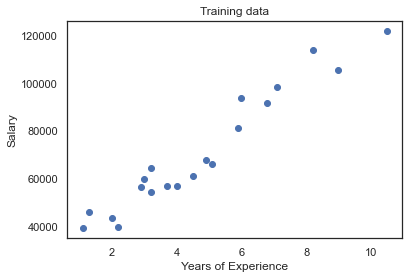

In [112]:
#visualization of training data
plt.title('Training data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Training, Y_Training)
plt.show()

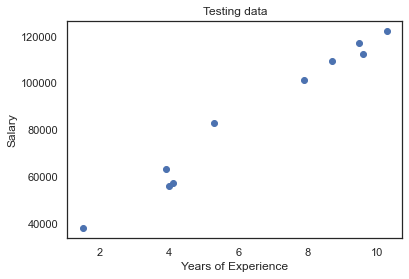

In [113]:
#visualization of testing data
plt.title('Testing data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Testing, Y_Testing)
plt.show()

# Question 2
Applying K means clustering

In [114]:
#reading the datasets
creditcard_data_df = pd.read_csv("K-Mean_Dataset.csv")
creditcard_data_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [90]:
# printing the null values
creditcard_data_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [91]:
# Replacing the null values with mean
creditcard_data_df.drop(['CUST_ID'],inplace=True,axis=1)
creditcard_data_df['MINIMUM_PAYMENTS'].fillna(value=creditcard_data_df['MINIMUM_PAYMENTS'].mean(),inplace=True)
creditcard_data_df['CREDIT_LIMIT'].fillna(value=creditcard_data_df['CREDIT_LIMIT'].mean(),inplace=True)

In [92]:
# K means with 3 clusters 
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(creditcard_data_df)
print(km)
# predicting the cluster 
y_cluster_kmeans = km.predict(creditcard_data_df)
score = metrics.silhouette_score(creditcard_data_df, y_cluster_kmeans)
print(score)

KMeans(n_clusters=3)
0.46594126305182004


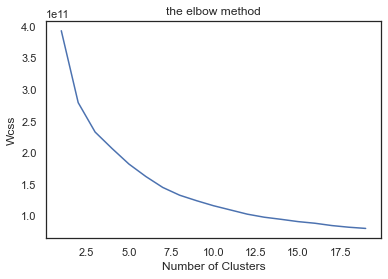

In [98]:
#elbow method
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(creditcard_data_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [94]:
kmeans = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(creditcard_data_df)

y_cluster_kmeans = kmeans.predict(creditcard_data_df)
silhouette_score = metrics.silhouette_score(creditcard_data_df, y_cluster_kmeans)
print(silhouette_score)

0.3810874517610816


# Question 3
Performing feature scaling and then applying K-Means on the scaled features




In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_data_df)

In [96]:
# K means with 3 clusters and feature scaling
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit( creditcard_df_scaled)
print(km)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(creditcard_df_scaled)
from sklearn import metrics
score = metrics.silhouette_score(creditcard_df_scaled, y_cluster_kmeans)
print(score)

KMeans(n_clusters=3)
0.25055570796307736


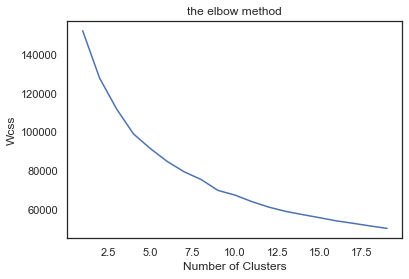

In [119]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(creditcard_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [120]:
kmeans = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(creditcard_df_scaled)
#print(labels)
y_cluster_kmeans = kmeans.predict(creditcard_df_scaled)
scaled_silhouette_score = metrics.silhouette_score(creditcard_df_scaled, y_cluster_kmeans)

In [121]:
print(scaled_silhouette_score)

0.20854008021562268


# Justification:
Silhouette score did not improve after the feature scalling.